## Data processing and plotting for figure05 showing a Critical Current Measurement carried out during Irradiation

This notebook shows how we obtained the data for figure05 of the paper titled:

$\textit{A facility for cryogenic ion irradiation and in operando characterization of Rare-Earth Barium Copper Oxide superconducting tapes}$ by A.R Devitre, D.X. Fischer, K.B. Woller, B.C. Clark, M.P. Short, D.G. Whyte, and Z.S. Hartwig, published by the Review of Scientific Instruments. 

In particular, the notebook follows the treatment of our data treatment from raw data files (provided in ~/data/figure05/) to the production figure. This figure can be regenerated, modified, exported and reutilized according to the license of the repository (see LICENSE file).

In [4]:
%matplotlib notebook
from scipy.optimize import curve_fit
import matplotlib, matplotlib.pyplot as plt
import os, numpy as np, pandas as pd
import hts_fitting as hts

# Change this to match the destination folder with data for figure05
parentDirectory = '../data/figure05/'
outputDirectory = '../figures/raw/'

# set a custom font
from matplotlib import font_manager
fontname = 'Century Gothic' 
fontfile = [f for f in font_manager.findSystemFonts(fontpaths='/Users/alexisdevitre/Library/Fonts') if fontname in f][0]
font_manager.fontManager.addfont(fontfile)
plt.rcParams['font.family'] = fontname

### Critical current measured before, during and after irradiation with 1.2 MeV x 30 nA beam

<IPython.core.display.Javascript object>


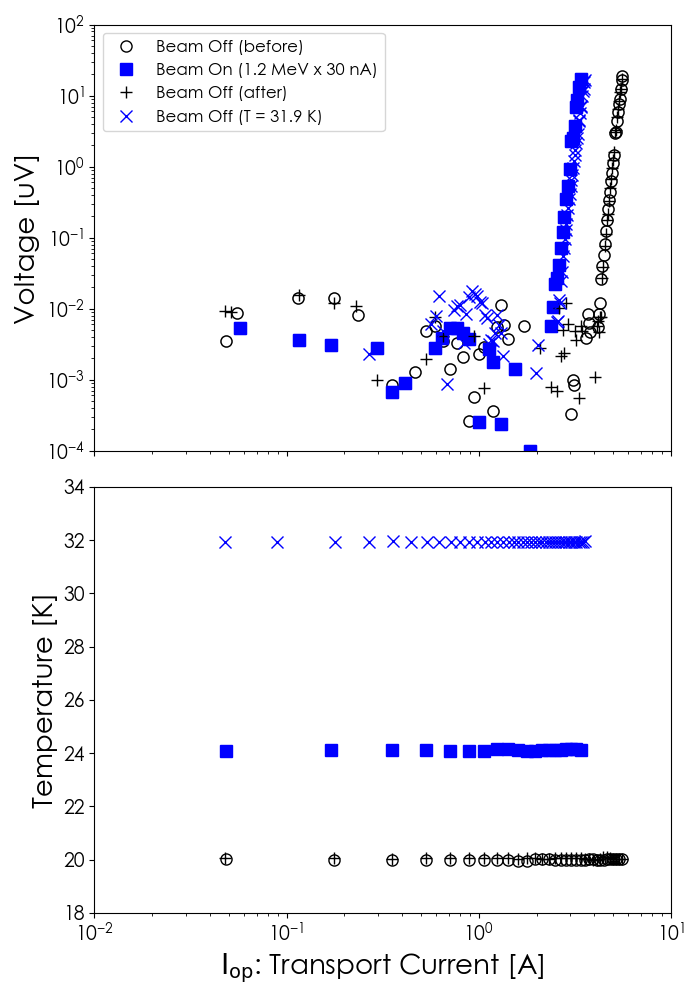

/Users/alexisdevitre/Documents/GitHub/2024-CryoHTS-Facility/code/hts_fitting.py:57: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_89005/308008642.py:27: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0].loglog(current, voltage*1e6, mec=mec, mfc=mfc, linestyle='None', color=lc, marker=m, alpha=.3)
/Users/alexisdevitre/Documents/GitHub/2024-CryoHTS-Facility/code/hts_fitting.py:57: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/Users/alexisdevitre/Documents/GitHub/2024-CryoHTS-Facility/code/hts_fitting.py:57: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/Users/alexisdevitre/Documents/GitHub/2024-CryoHTS-Facility/code/hts_fitting.py:57: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.lo

In [5]:
color = 'b'

files = [
    'Ic_2023-10-31_23-06-11441040_f23-beforeIrradiation-20K.txt',
    'Ic_2023-10-31_23-12-11310373_f23-duringIrradiation-20K.txt',
    'Ic_2023-10-31_23-09-11678914_f23-afterIrradiation-20K.txt',
    'Ic_2023-10-31_23-28-08056169_f23-afterIrradiation-32K.txt'
]

labels = [
    'Beam Off (before)',
    'Beam On (1.2 MeV x 30 nA)',
    'Beam Off (after)',
    'Beam Off (T = {:4.1f} K)'.format(31.9)
]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 10))
ax[0].axhline(color='k', alpha=.3)

for f, l in zip(files, labels):
    
    data = pd.read_csv(parentDirectory+f, skiprows=1, delim_whitespace=True)
    ic, n, current, voltage, chisq, pcov = hts.fitIcMeasurement(parentDirectory+f, function='powerLaw')
    
    if 'before' in f:
        mfc, mec, m, ls, lc, msz = 'None', 'k', 'o', '-', 'k', 8
        ax[0].loglog(current, voltage*1e6, mec=mec, mfc=mfc, linestyle='None', color=lc, marker=m, alpha=.3)
    elif 'during' in f:
        mfc, mec, m, ls, lc, msz = color, color, 's', '-', 'b', 8
        ax[0].loglog(current, voltage*1e6, mec=mec, mfc=mfc, linestyle='None', color=lc, marker=m, alpha=.3)
    elif 'afterIrradiation-20K' in f:
        mfc, mec, m, ls, lc, msz = 'k', 'k', '+', 'None', 'k', 8
    elif 'afterIrradiation-32K' in f:
        mfc, mec, m, ls, lc, msz = 'None', color, 'x', 'None', 'b', 8
        
    ax[0].loglog(current, voltage*1e6, mec=mec, mfc=mfc, linestyle='None', marker=m, markersize=msz, label=l)
    ax[1].semilogx(data.iHTS_A[::3], data.tHTS_K[::3], mfc=mfc, mec=mec, marker=m, linestyle='None')

ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xlim(1e-2, 1e1)
ax[0].set_ylim(1e-4, 1e2)#set_ylim(-0.1, 0.5)
ax[1].set_ylim(18, 34)
ax[1].set_yticks([18, 20, 22, 24, 26, 28, 30, 32, 34])
ax[0].set_ylabel('Voltage [uV]')
ax[1].set_xlabel('$\mathrm{I_{op}}$: Transport Current [A]')
ax[1].set_ylabel('Temperature [K]') 
fig.tight_layout()

ax[0].set_rasterized(True)
ax[1].set_rasterized(True)
plt.savefig(outputDirectory+'figure05.svg')